In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Read and Review the Dataset

In [52]:
data = pd.read_csv('breast_cancer_data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Attribute Information:

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

1 ID number

2 Diagnosis (M = malignant, B = benign)

3 - 32 (Ten real-valued features are computed for each cell nucleus):

- radius (mean of distances from center to points on the perimeter)

- texture (standard deviation of gray-scale values)

- perimeter

- area

- smoothness (local variation in radius lengths)

- compactness (perimeter^2 / area - 1.0)

- concavity (severity of concave portions of the contour)

- concave points (number of concave portions of the contour)

- symmetry

- fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.

In [53]:
data.shape

(569, 33)

### data.shape -> 569 rows and 33 colums. It means that we have 569 observations and 33 columns of 32 features and 1 label

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Exploratory Data Analysis (EDA)

In [55]:
# statistical summary of dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


- Column Id is not relevent our machine learnig problem
- Last column Unnamed: 32 is full of NaN values
- Column diagnosis is our target variable

In [56]:
# dropping column Id and column Unnamed: 32
data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Text(0.95, 360, '357')

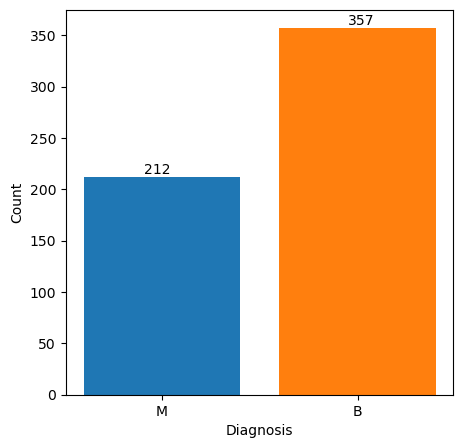

In [57]:
# To see balance of dataset
plt.figure(figsize=(5,5))
diagnosis_b = data[data['diagnosis']=='B']
diagnosis_m = data[data['diagnosis']=='M']

plt.bar('M', diagnosis_m.shape[0])
plt.bar('B', diagnosis_b.shape[0])
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.text(-0.09,215,diagnosis_m.shape[0])
plt.text(0.95,360,diagnosis_b.shape[0])

### No observation of much imbalanced for this dataset

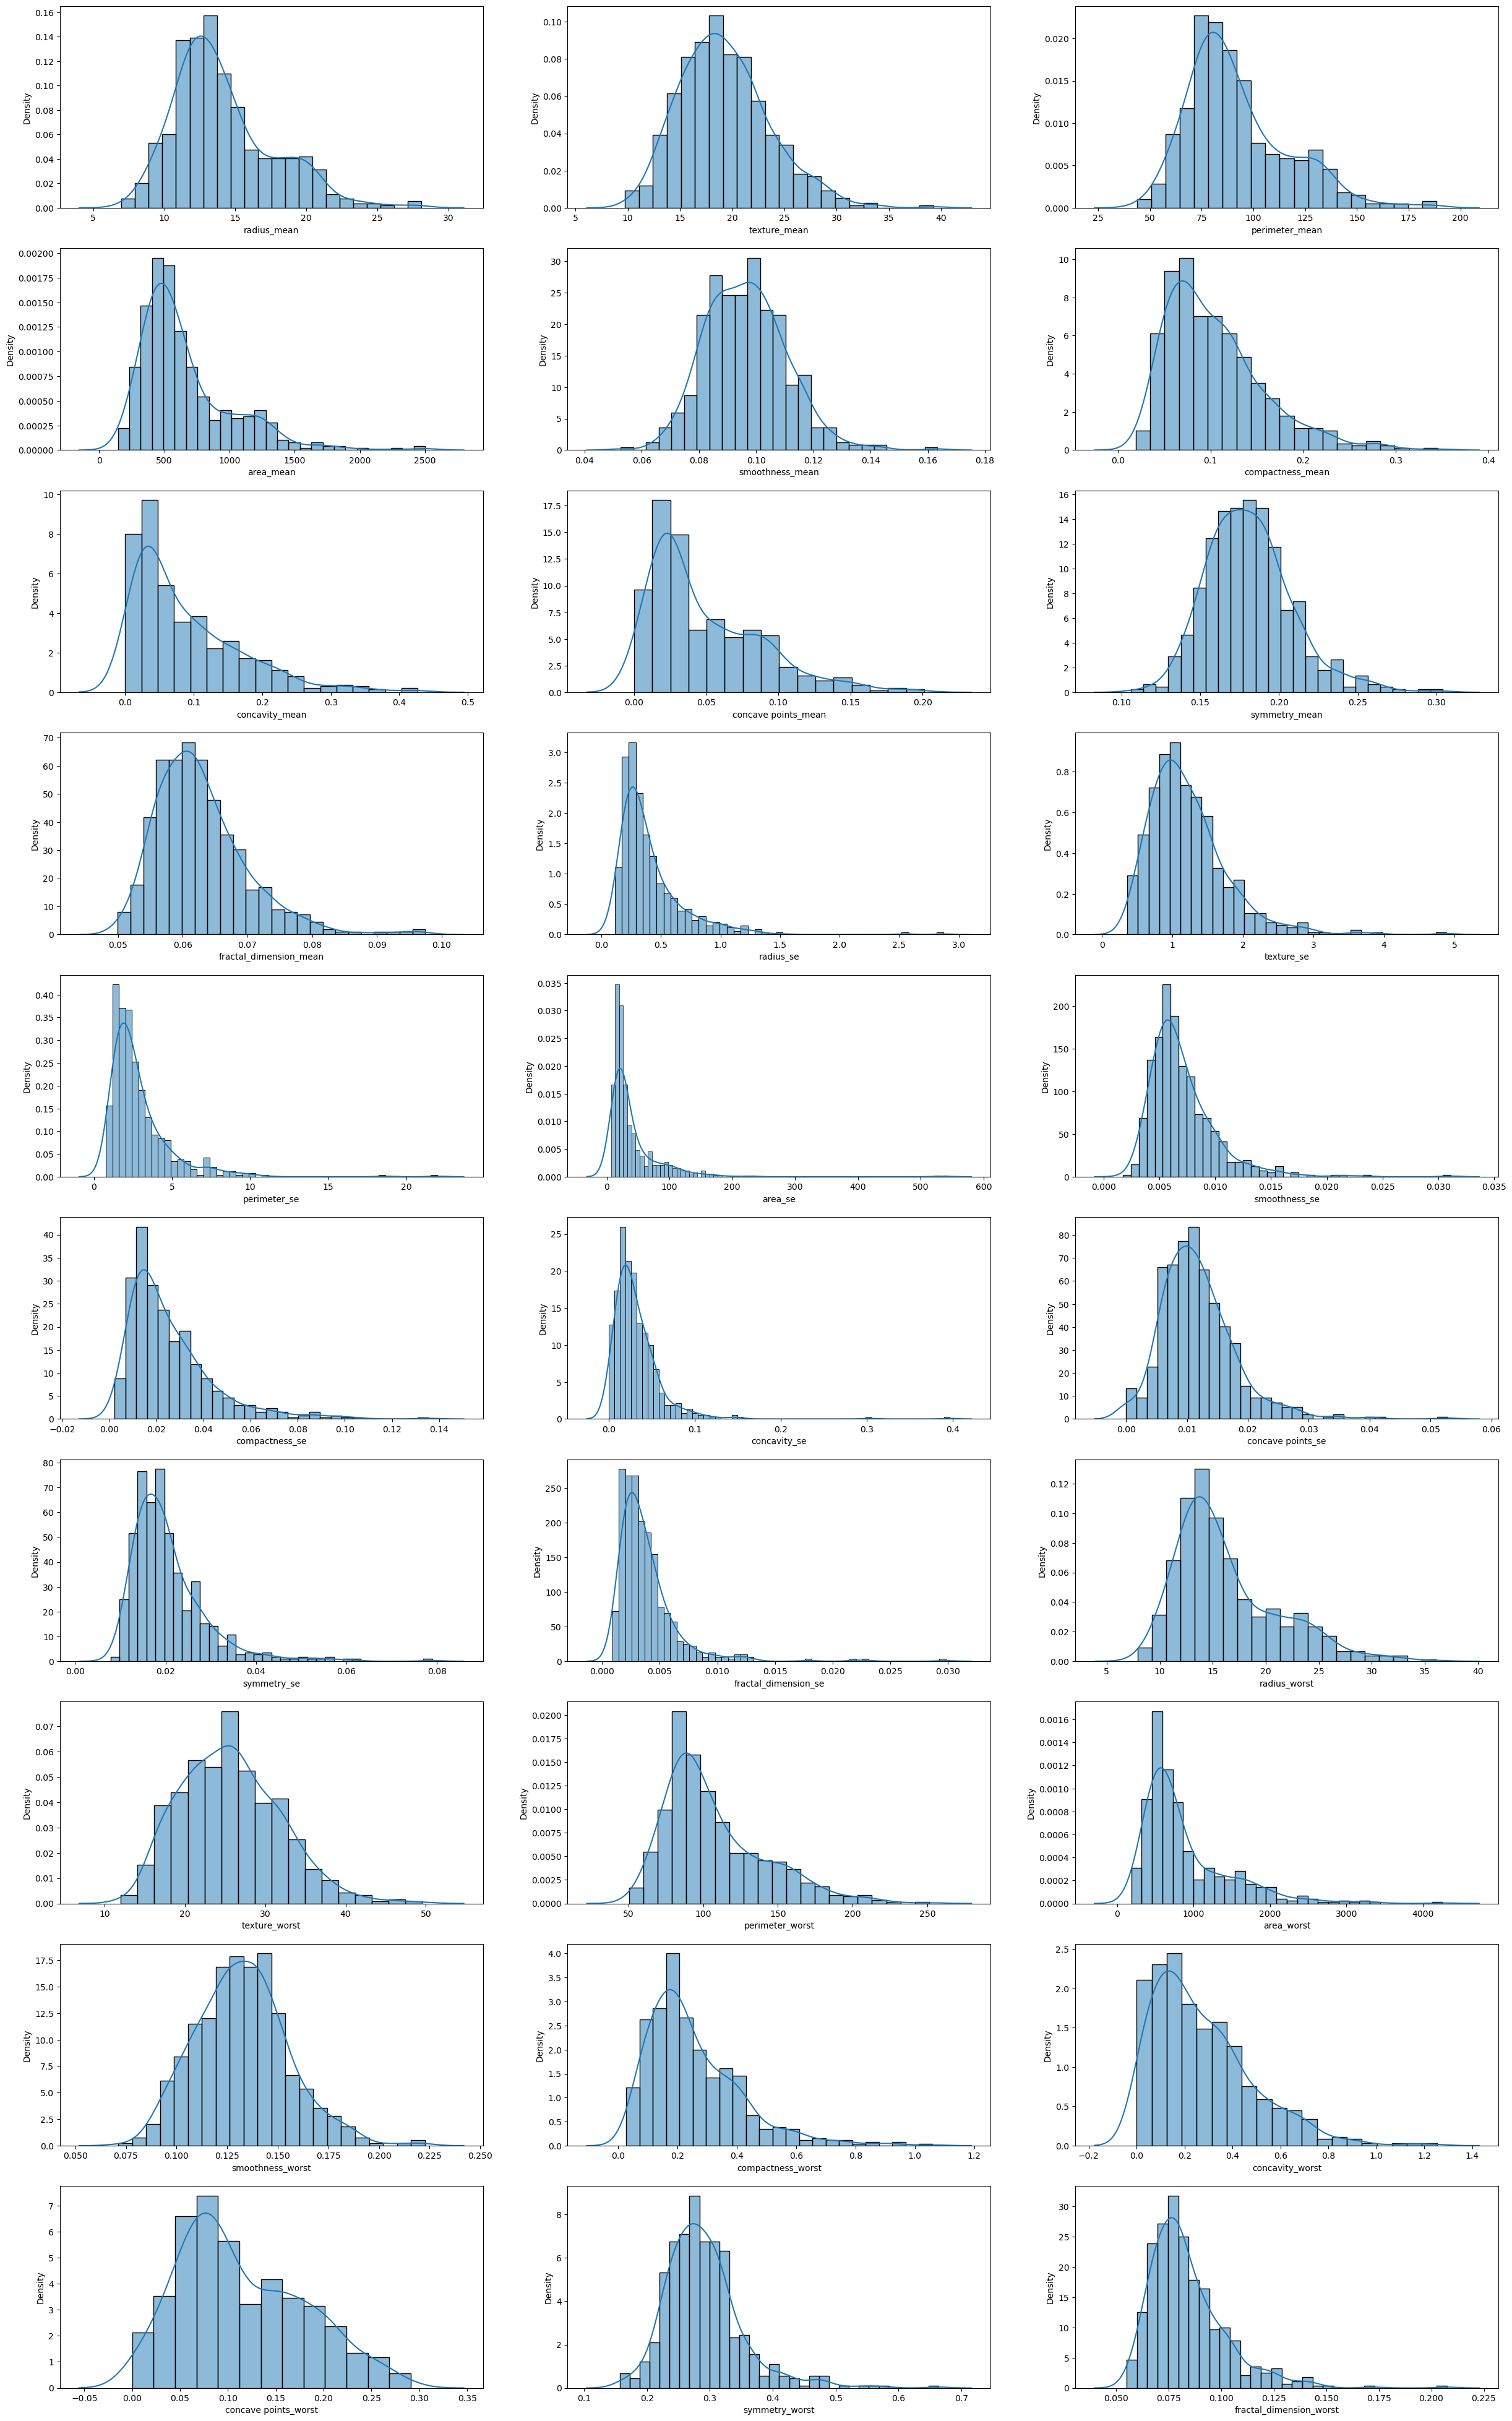

In [58]:
# Only numerical features and plotting them
numerical_features = data.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(30,50))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(10, 3, i)
    sns.histplot(data[col], kde=True, stat='density', kde_kws=dict(cut=3))

- Features 'radius_mean', 'texture_mean', 'perimeter_mean', 'smoothness_mean', 'symmetry_mean', 'texture_worst' and 'smoothness_worst', follow normal distribution.
- Other features follows right skewed distribution.
- Most of the features has outliers

<Axes: >

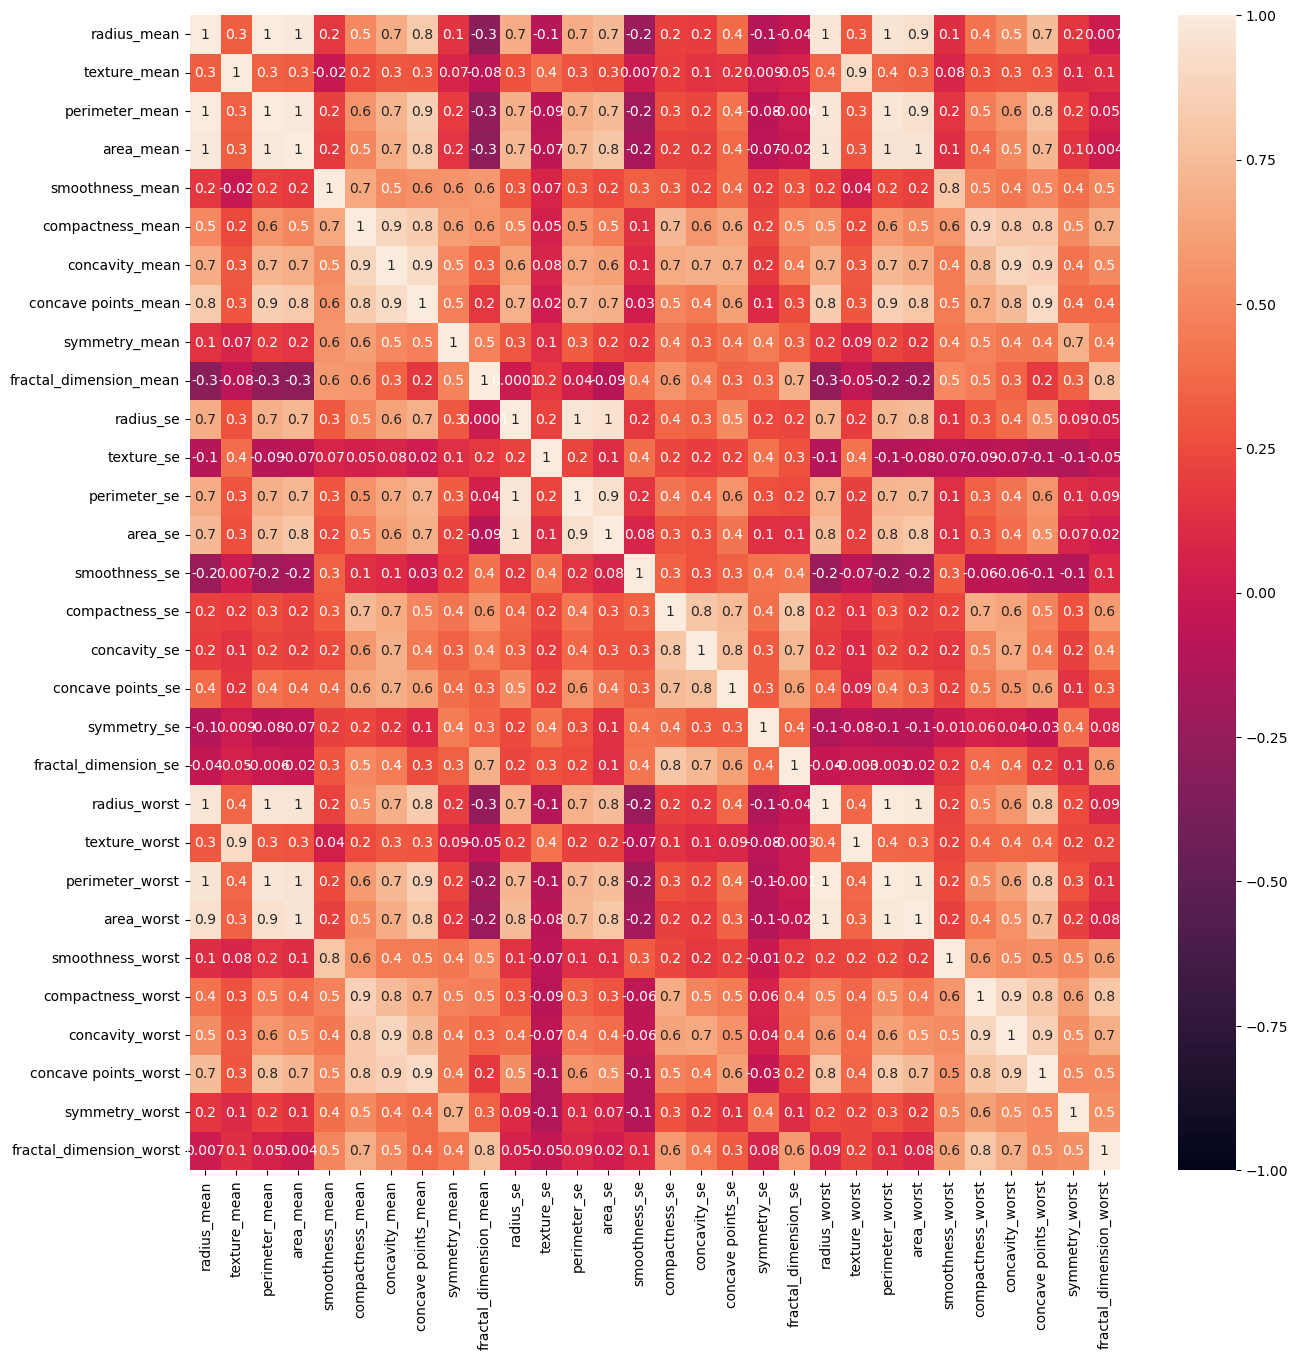

In [59]:
# correlation heatmap
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), vmax=1, vmin=-1, annot=True, fmt='.1g')

- There are multicollinearity in this dataset. Several features show strong posistive correlation.
#### Definition -> Multicollinearity occurs when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results.

In [60]:
import pandas as pd
from sklearn.linear_model import LinearRegression
def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = data[X], data[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [61]:
calculate_vif(df=data, features=data.corr().columns)

,VIF,Tolerance
radius_mean,3806.115296,0.000263
texture_mean,11.884048,0.084146
perimeter_mean,3786.400419,0.000264
area_mean,347.878657,0.002875
smoothness_mean,8.194282,0.122036
compactness_mean,50.505168,0.019800
concavity_mean,70.767720,0.014131
concave points_mean,60.041733,0.016655
symmetry_mean,4.220656,0.236930
fractal_dimension_mean,15.756977,0.063464


- VIF starts at 1 and has no upper limit
- VIF = 1, no correlation between the independent variable and the other variables
- VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

As we see, there are many features with too high VIF values. Let's asses a threshold value for correlation and remove features with higher value

In [62]:
#finding correlated features with a threshold value

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [63]:
correlated_cols = correlation(data, 0.8) # threshold value is 0.8
correlated_cols

{'area_mean',
 'area_se',
 'area_worst',
 'compactness_worst',
 'concave points_mean',
 'concave points_worst',
 'concavity_mean',
 'concavity_se',
 'concavity_worst',
 'fractal_dimension_se',
 'fractal_dimension_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst',
 'smoothness_worst',
 'texture_worst'}

## Data Processing

In [64]:
# creating copy of data
data_copy = data.copy()

### Handling Null Values

In [65]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### Handling duplicated observation in dataset

In [66]:
data.duplicated().any()

False

### Dealing with Multicollinearity

In [67]:
# removing columns with multicollinearity

data.drop(correlated_cols, axis=1, inplace=True)
data.shape

(569, 14)

### Encoding Categorical Variables

In [68]:
object_cols = data.select_dtypes(include=['object'])
object_cols.columns

Index(['diagnosis'], dtype='object')

In [69]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [70]:
data['diagnosis'] = pd.get_dummies(data.diagnosis, drop_first=True)
data['diagnosis'].unique()

array([1, 0], dtype=uint8)

- 1 represent Malignant
- 0 represent Benlign

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    uint8  
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   smoothness_mean         569 non-null    float64
 4   compactness_mean        569 non-null    float64
 5   symmetry_mean           569 non-null    float64
 6   fractal_dimension_mean  569 non-null    float64
 7   radius_se               569 non-null    float64
 8   texture_se              569 non-null    float64
 9   smoothness_se           569 non-null    float64
 10  compactness_se          569 non-null    float64
 11  concave points_se       569 non-null    float64
 12  symmetry_se             569 non-null    float64
 13  symmetry_worst          569 non-null    float64
dtypes: float64(13), uint8(1)
memory usage: 58.

### Seperating features and target

In [72]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis'].to_numpy()

### Splitting dataset into test and train set

In [73]:
from sklearn.model_selection import train_test_split

X_training_dataset, X_test_dataset, y_training_dataset, y_test_dataset = train_test_split(X, y, test_size=0.2, random_state=34)

In [74]:
print('Shape of Train set: ', X_training_dataset.shape)
print('Shape of Test set: ', X_test_dataset.shape)

Shape of Train set:  (455, 13)
Shape of Test set:  (114, 13)


- There are 455 observations in training dataset and 8114 observations in test dataset

In [75]:
print('Shape of Train set: ', y_training_dataset.shape)
print('Shape of Test set: ', y_test_dataset.shape)

Shape of Train set:  (455,)
Shape of Test set:  (114,)


In [76]:
X_training_dataset = np.array(X_training_dataset)
X_test_dataset = np.array(X_test_dataset)
y_training_dataset = np.array(y_training_dataset)
y_test_dataset = np.array(y_test_dataset)

### Feature Scaling

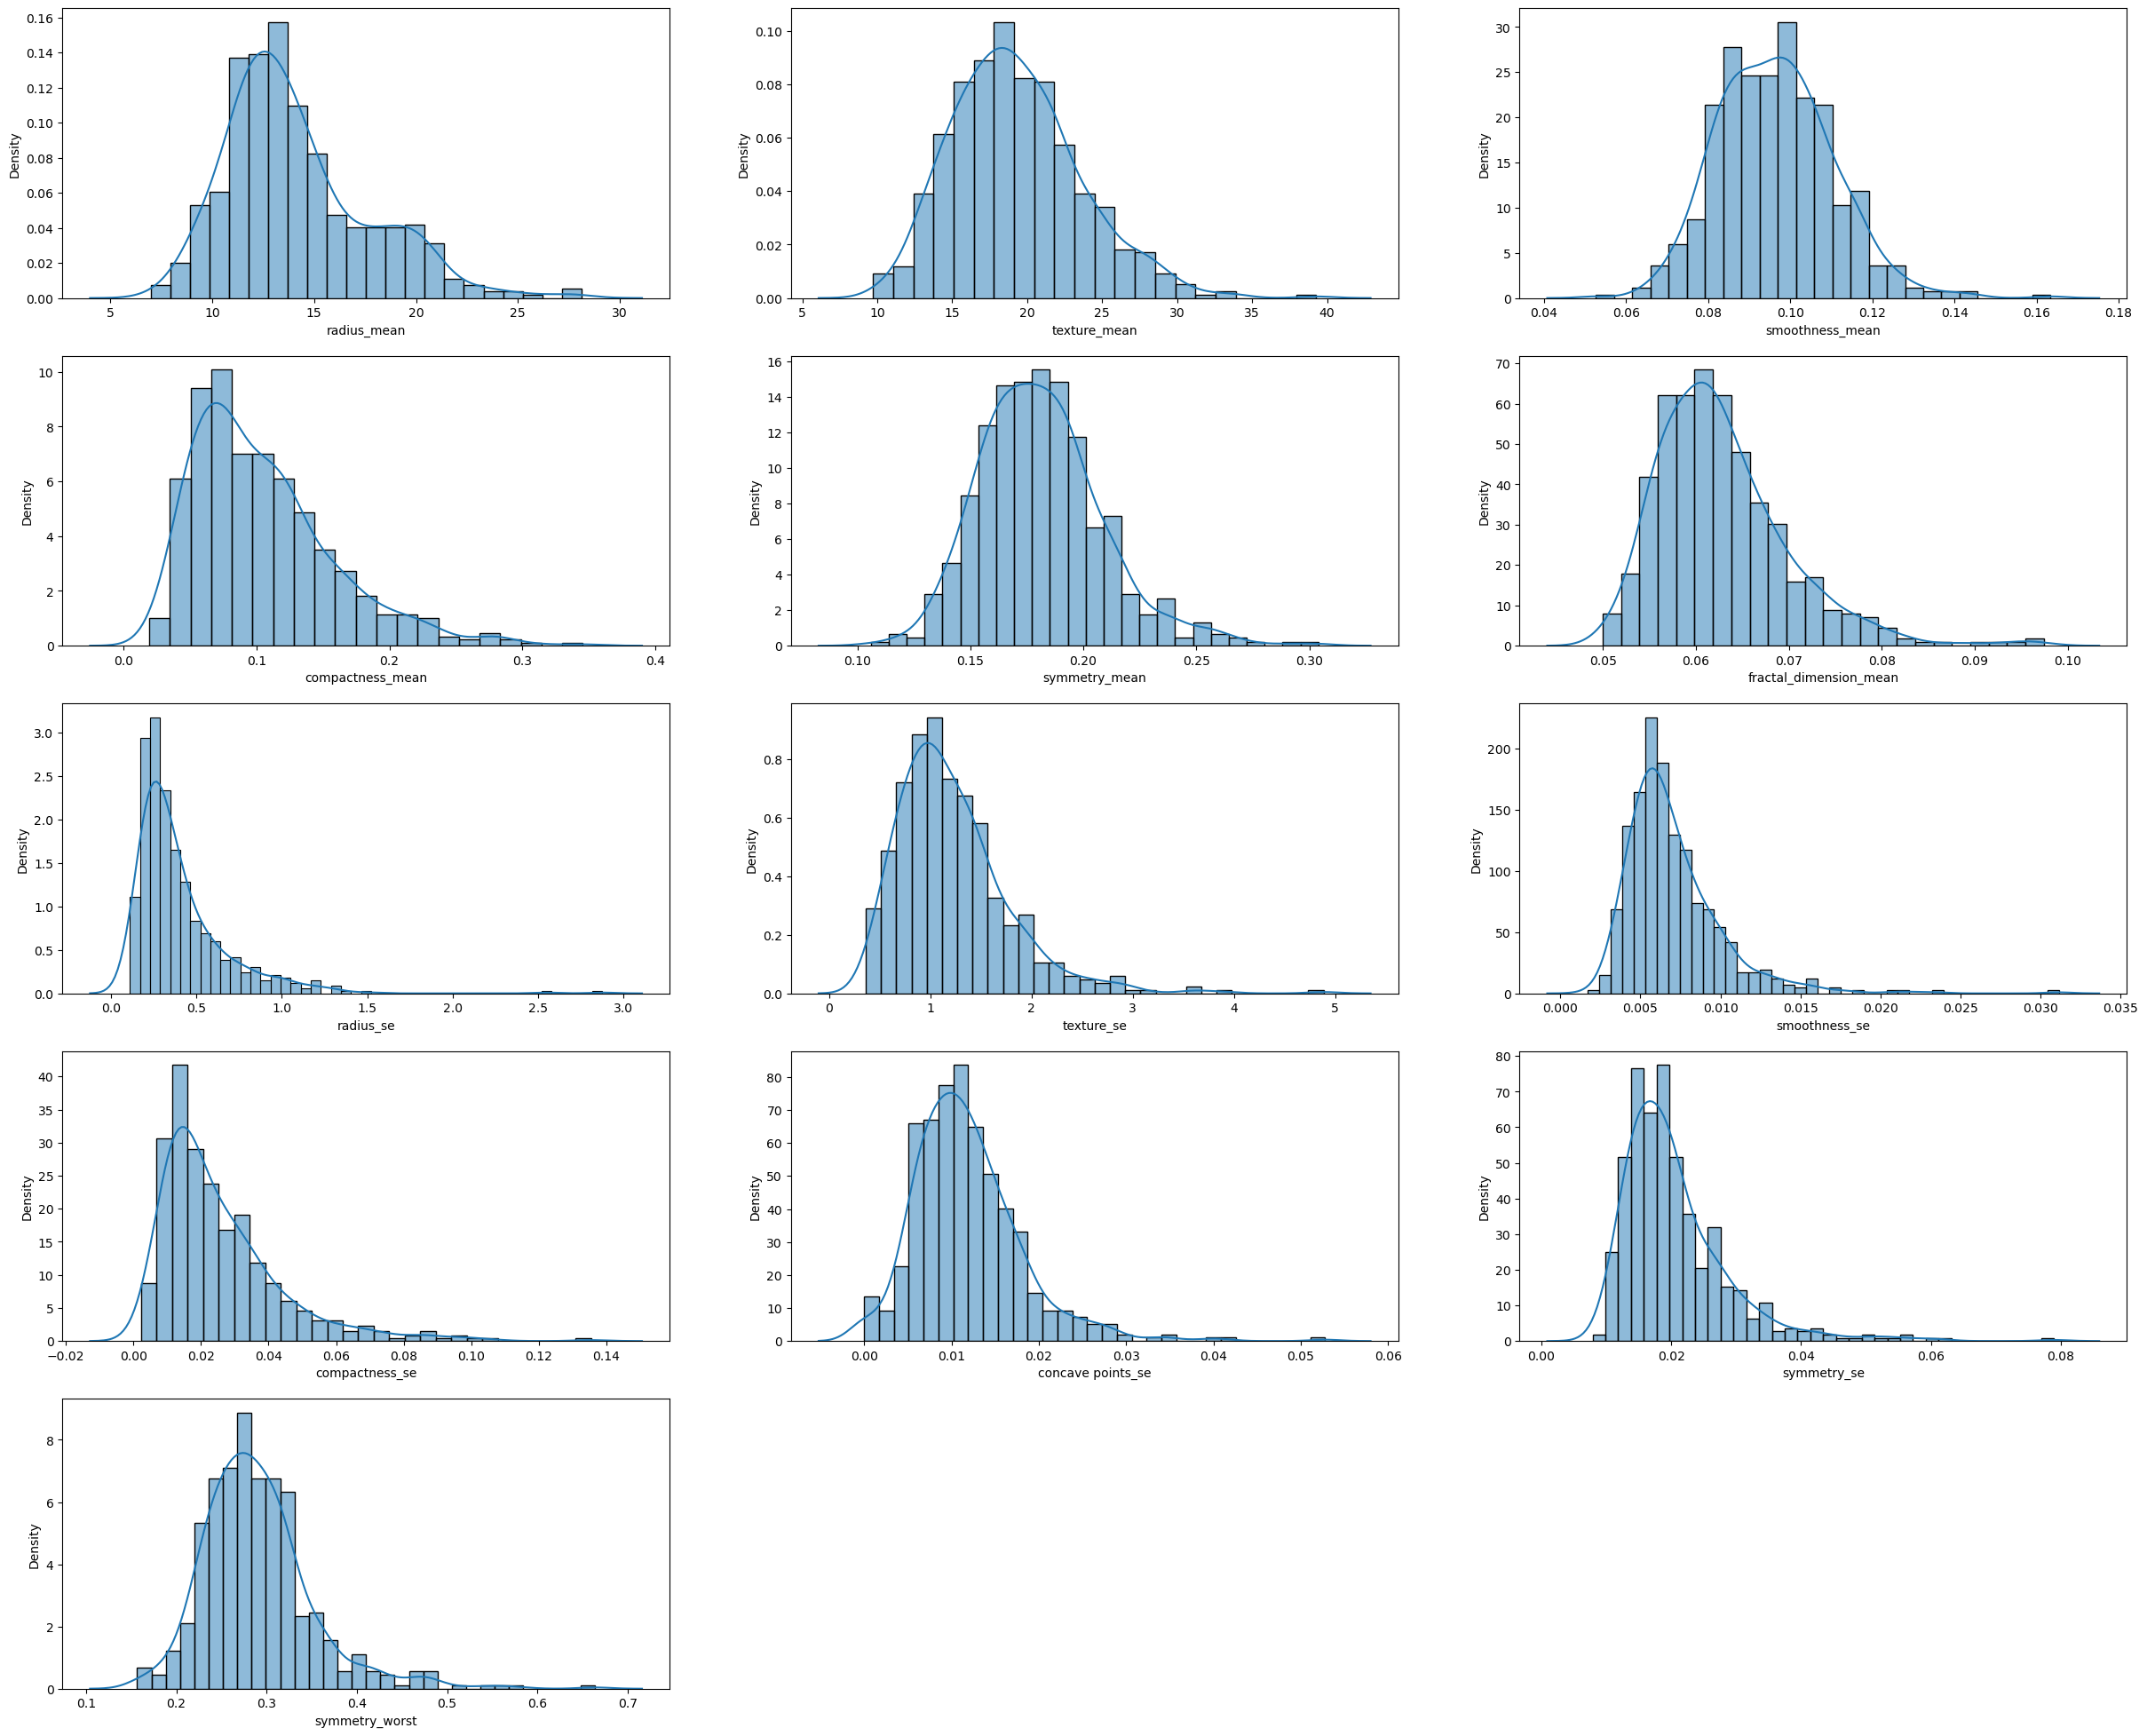

In [77]:
# Only numerical features and plotting them
numerical_features = data.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(30,50))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(10, 3, i)
    sns.histplot(data[col], kde=True, stat='density', kde_kws=dict(cut=3))

- Distribution of numerical features seem to be okay for using Standard Scalar

In [78]:
# standardizing the dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_training_dataset = scaler.fit_transform(X_training_dataset)
X_test_dataset = scaler.transform(X_test_dataset)

- The dataset is standardized (mean = 0 and standard deviation = 1).


In [79]:
X_training_dataset

array([[ 1.12487728,  0.57976755, -1.61321455, ...,  0.4445095 ,
         0.10576743, -0.85953495],
       [-0.33651758,  0.01096487, -0.04308845, ..., -0.32098703,
         0.83123015,  1.05683773],
       [ 0.4457585 , -1.2271518 , -0.12628806, ...,  0.15345876,
        -0.45346815, -0.30664503],
       ...,
       [-0.54569762,  0.71682844, -1.02939501, ..., -1.19083187,
        -0.52589569,  0.28216711],
       [ 2.89287851,  0.20513446,  3.43493998, ...,  1.06960713,
         2.96368686,  0.4727111 ],
       [ 0.38558341,  0.40615709,  1.10961736, ...,  1.59382921,
        -0.03908765,  0.13066903]])

# Building Machine Learning Models

## 1. Logistic Regression

### Model Training

In [80]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression(random_state=12)

#training the model with training dataset
logReg.fit(X_training_dataset, y_training_dataset)

LogisticRegression(random_state=12)

### Model Evaluation

In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#prediction for the test data
y_pred = logReg.predict(X_test_dataset)

#evaluating the model
acc = accuracy_score(y_test_dataset, y_pred)
pre = precision_score(y_test_dataset, y_pred)
rec = recall_score(y_test_dataset, y_pred)
f1 = f1_score(y_test_dataset, y_pred)

In [82]:
#storing evaluation metrics to a dataframe

results = pd.DataFrame([['Logistic Regression', acc, pre, rec, f1]],
                       columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.982456,1.0,0.947368,0.972973


- With default parameters Model is giving accuracy of 98.2%

In [83]:
#printing confusion matrix
confusion_matrix(y_test_dataset, y_pred)

array([[76,  0],
       [ 2, 36]], dtype=int64)

- There are 108 correct predictions (76 TP and 36 TN)
- 6 predictions are wrong (0 FP and 2 FN)

### Cross Validation

In [85]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=logReg, X=X_training_dataset, y=y_training_dataset, cv=20)

print('Accuracy is {:.2f} %'.format(accuracies.mean()*100))
print('Standard Deviation is {:.2f} %'.format(accuracies.std()*100))

Accuracy is 95.17 %
Standard Deviation is 3.63 %


- Our model has accuracy in the cross validation score range

## 2. Random Forest Classifier

### Model Training

In [86]:
from sklearn.ensemble import RandomForestClassifier

ranForest = RandomForestClassifier(random_state = 34)

#training the model
ranForest.fit(X_training_dataset, y_training_dataset)

RandomForestClassifier(random_state=34)

In [87]:
# model prediction with test data
y_pred = ranForest.predict(X_test_dataset)

### Model Evaluation

In [88]:
#evaluating the model
acc = accuracy_score(y_test_dataset, y_pred)
pre = precision_score(y_test_dataset, y_pred)
rec = recall_score(y_test_dataset, y_pred)
f1 = f1_score(y_test_dataset, y_pred)

In [89]:
#storing evaluation metrics to a dataframe

rf_results = pd.DataFrame([['Random Forest Classifier', acc, pre, rec, f1]],
                       columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(rf_results, ignore_index=True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.982456,1.000000,0.947368,0.972973
1,Random Forest Classifier,0.956140,0.971429,0.894737,0.931507


- Random Forest Classifier has lower scores than Logistic regression

In [91]:
#printing confusion matrix
confusion_matrix(y_test_dataset, y_pred)

array([[75,  1],
       [ 4, 34]], dtype=int64)

- Random Forest Classifier made 109 correct and 5 wrong predictions

### Cross Validation

In [92]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=ranForest, X=X_training_dataset, y=y_training_dataset, cv=20)

print('Accuracy is {:.2f} %'.format(accuracies.mean()*100))
print('Standard Deviation is {:.2f} %'.format(accuracies.std()*100))

Accuracy is 93.20 %
Standard Deviation is 5.30 %


- Random Forest has lower accuracy and higher standard deviation
- Logistic Regression will be our final model since it has better performance

### Hyperparameter Tuning

In [94]:
#specifying differnet hyperparameters for random search cross validation
from sklearn.model_selection import RandomizedSearchCV

params = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'], 'C' : [0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2],
         'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [97]:
random_search = RandomizedSearchCV(estimator=logReg, param_distributions=params, cv=10, verbose=3, n_jobs=-1,
                                  random_state=12, scoring='roc_auc')
random_search.fit(X_training_dataset, y_training_dataset)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=LogisticRegression(random_state=12),
                   n_jobs=-1,
                   param_distributions={'C': [0.1, 0.25, 0.5, 0.75, 1, 1.25,
                                              1.5, 1.75, 2],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=12, scoring='roc_auc', verbose=3)

In [98]:
# finding the best estimator
random_search.best_estimator_

LogisticRegression(C=1.75, random_state=12, solver='sag')

In [99]:
# finding the best score
random_search.best_score_

0.989226955149876

In [100]:
#finding best params
random_search.best_params_

{'solver': 'sag', 'penalty': 'l2', 'C': 1.75}

- We got the best params value as optimization algorithm = sag, norm of the penalty = l2 and regularization parameter C = 1.75

### Final Model

In [104]:
#training the model with best hyperparameters

classifier = LogisticRegression(solver='sag', penalty='l2', C=1.75, random_state=14)
classifier.fit(X_training_dataset, y_training_dataset)

LogisticRegression(C=1.75, random_state=14, solver='sag')

In [106]:
# making predictions with test data
y_pred = classifier.predict(X_test_dataset)

### Model Evaluation

In [108]:
#calculating evaluation metrics
acc = accuracy_score(y_test_dataset, y_pred)
pre = precision_score(y_test_dataset, y_pred)
rec = recall_score(y_test_dataset, y_pred)
f1 = f1_score(y_test_dataset, y_pred)

#storing evaluation metrics to a dataframe

lg_results = pd.DataFrame([['Tuned Logistic Regression', acc, pre, rec, f1]],
                       columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(lg_results, ignore_index=True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.982456,1.000000,0.947368,0.972973
1,Random Forest Classifier,0.956140,0.971429,0.894737,0.931507
2,Tuned Logistic Regression,0.982456,1.000000,0.947368,0.972973


- The tuned model has same accuracy as default logistic regression model. 
- Logistic regression does not really have any critical hyperparameters to tune.

In [110]:
#printing confusion matrix
confusion_matrix(y_test_dataset, y_pred)

array([[76,  0],
       [ 2, 36]], dtype=int64)

- The model predicted 112 correct prediction while 2 were wrong
- Two predictions are False Positive